### aim: 

### date: 

In [165]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [166]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [167]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

timeseries

- [ ]  pco2, co2 flux, ppt, tchl, export - by region
- [ ]  amoc, salt, t

maps

- [ ]  pco2, co2flux, ppt, tchl, export

Text(0.5, 0.98, 'ocean regions, subdivided, with atlantic mask')

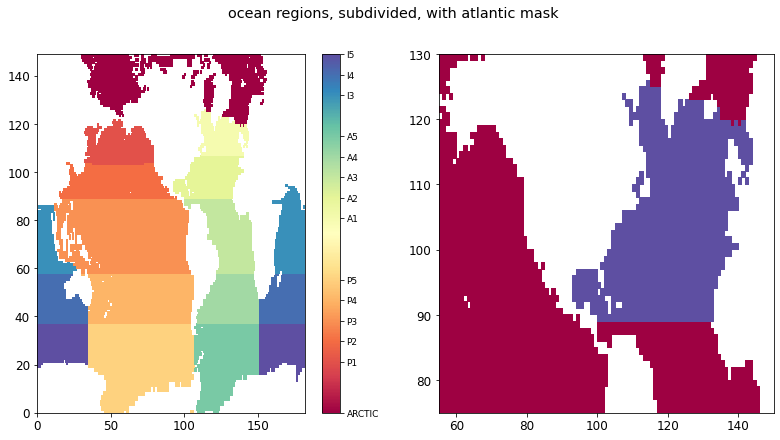

In [168]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

masknoATL = np.copy(maskno)

masknoATL[np.where(masknoATL == 2.6) ]= 5
masknoATL[np.where(masknoATL == 2.4) ]= 5
masknoATL[masknoATL < 5] = 0

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics, ax = axs[0])
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

w = axs[1].pcolor(masknoATL, cmap = tcm, vmin = 0.5, vmax = 4)
axs[1].set_xlim([55,150])
axs[1].set_ylim([75,130])
#cbar = plt.colorbar(w, ticks=tics, ax = axs[0])
#t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided, with atlantic mask')

### AMOC RIV12 code

In [169]:


def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        
    return max_atl


In [170]:
GEA0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVA0')
GEB0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVB0')
GEC0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVC0')
GED0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVD0')

GEA0_mocdat = xr.open_mfdataset(GEA0_moc) 
GEB0_mocdat = xr.open_mfdataset(GEB0_moc) 
GEC0_mocdat = xr.open_mfdataset(GEC0_moc) 
GED0_mocdat = xr.open_mfdataset(GED0_moc) 

GEA0_max_amoc = get_max_amoc(GEA0_mocdat)
GEB0_max_amoc = get_max_amoc(GEB0_mocdat)
GEC0_max_amoc = get_max_amoc(GEC0_mocdat)
GED0_max_amoc = get_max_amoc(GED0_mocdat)

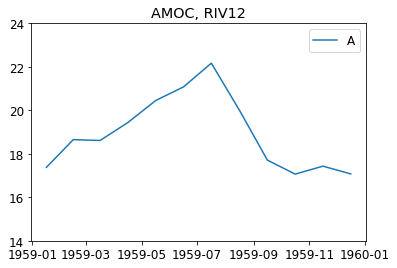

In [171]:
nicetime  = GEA0_mocdat.indexes['time_counter'].to_datetimeindex()
plt.plot(nicetime[0:12], GEA0_max_amoc[0:12], label = 'A')
# plt.plot(nicetime, GEB0_max_amoc, label = 'B')
# plt.plot(nicetime, GEC0_max_amoc, label = 'C')
# plt.plot(nicetime, GED0_max_amoc, label = 'D')
plt.title('AMOC, RIV12')
plt.ylim([14,24])
plt.legend()

### Carbon flux code

In [172]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def get_ts(yrst = 1959, yrend = 2022, var = 'Cflx', ttype = 'diad_T', trun = 'TOM12_TJ_RVA0',\
    madein = 'AMOC-PLANKTOM/first-maps-ts.ipynb',\
    tunits = 'mol/m2/s'):

    savenam = f'./data/NAtl_{var}_{trun}_{yrst}-{yrend}.nc'
    print(savenam)
    ### make atlantic mask
    regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

    regdict = {'ARCTIC' : {'number' : 0.5},
               'P1' : {'number': 1.0},
              'P2' : {'number': 1.2},
               'P3' : {'number': 1.4},
               'P4' : {'number': 1.6},
               'P5' : {'number': 1.8},
                'A1' : {'number': 2.4},
              'A2' : {'number': 2.6},
               'A3' : {'number': 2.8},
               'A4' : {'number': 3},
               'A5' : {'number': 3.2},
               'I3' : {'number': 3.6},
               'I4' : {'number': 3.8},
               'I5' : {'number': 4},

              }
    
    
    tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')
    maskno = np.zeros([149,182])
    for i in range(0, len(regs)):
        maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
        tics.append(regdict[regs[i]]['number'])
    maskno[maskno == 0] = np.nan

    masknoATL = np.copy(maskno)

    masknoATL[np.where(masknoATL == 2.6) ]= 5
    masknoATL[np.where(masknoATL == 2.4) ]= 5
    masknoATL[masknoATL < 5] = 0
    
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
    tmesh['csize'] = tmesh['csize'].where(masknoATL == 5, 0)
    size_Natl = np.nansum(tmesh['csize'].values)
    
    ##### extract data
    
    yrs = np.arange(yrst,yrend+1,1)
    times = pd.date_range(f"{yrst}/01/01",f"{yrend+1}/01/01",freq='MS',closed='left')
    vals = np.zeros(len(times))
    ind = 0
    for i in range(0,len(yrs)):  
        
        print(yrs[i])
        
        rv_diad = xr.open_dataset(make_yearlist(yrs[i],yrs[i],ttype,trun)[0])
        
        if var == 'Cflx':
            tdat = rv_diad[var].weighted(tmesh['csize']).mean(dim = ['x','y'])#.mean(dim = 'time_counter')
            vals[ind:ind+12] = tdat.values
        
        if var == 'pCO2':
            print('ok')
            tdat = rv_diad[var].weighted(tmesh['csize']).mean(dim = ['x','y'])#.mean(dim = 'time_counter')
            vals[ind:ind+12] = tdat.values
        
            
        if var == 'PPT':
            PPT = rv_diad[var].weighted(rv_diad.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
            tdat = PPT.weighted(tmesh['csize']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tdat.values
        
        if var == 'EXP':
            print('ok')
            tdat = rv_diad['EXP'].isel(deptht=10).weighted(tmesh['csize']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tdat.values
            
        ind = ind+12    

    data_vars = {var:(['time_counter'], vals,
    {'units': tunits,
    'long_name':''}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times),
            }
    # define global attributes
    attrs = {'made in':madein,
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)  
        


In [173]:
extract = False
if extract:
#     get_ts(yrst = 1959, yrend = 2022, var = 'Cflx', ttype = 'diad_T', trun = 'TOM12_TJ_RVA0',\
#     madein = 'AMOC-PLANKTOM/first-maps-ts.ipynb',\
#     tunits = 'mol/m2/s')
        
#     get_ts(yrst = 1959, yrend = 2022, var = 'EXP', ttype = 'diad_T', trun = 'TOM12_TJ_RVA0',\
#     madein = 'AMOC-PLANKTOM/first-maps-ts.ipynb',\
#     tunits = 'mol/m2/s')
        
#     get_ts(yrst = 1959, yrend = 2022, var = 'PPT', ttype = 'diad_T', trun = 'TOM12_TJ_RVA0',\
#     madein = 'AMOC-PLANKTOM/first-maps-ts.ipynb',\
#     tunits = 'mol/m3/s')   

    get_ts(yrst = 1959, yrend = 2022, var = 'pCO2', ttype = 'diad_T', trun = 'TOM12_TJ_RVA0',\
    madein = 'AMOC-PLANKTOM/first-maps-ts.ipynb',\
    tunits = 'mol/m3/s')     

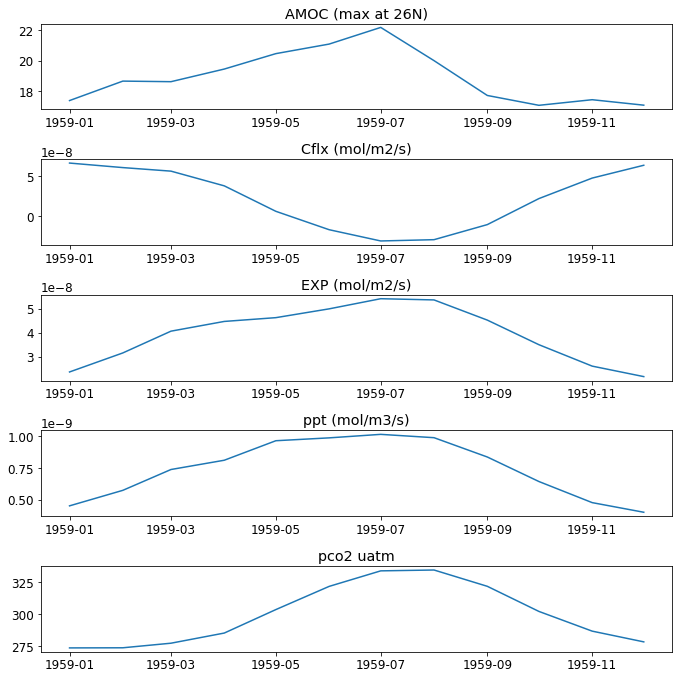

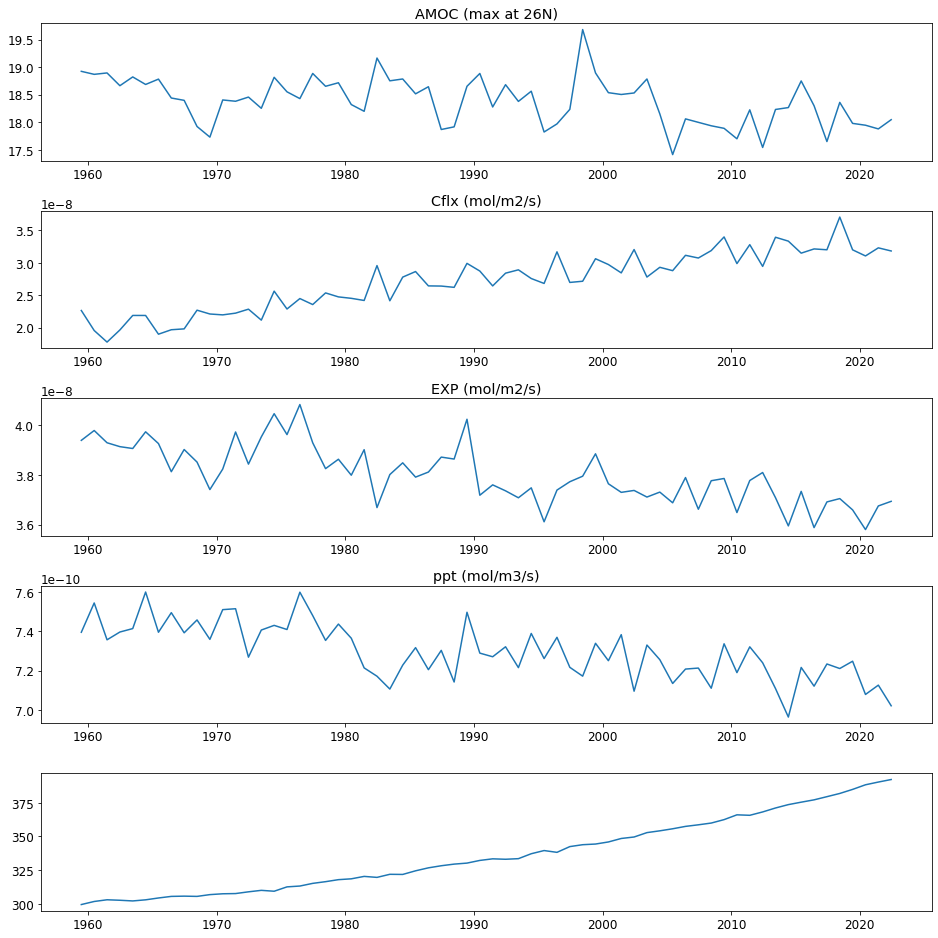

In [178]:
RVA0_Cflx = xr.open_dataset('./data/NAtl_Cflx_TOM12_TJ_RVA0_1959-2022.nc')
RVA0_Cflx['AMOC'] = RVA0_Cflx.Cflx.copy(deep = True)
RVA0_Cflx['AMOC'].values = GEA0_max_amoc

RVA0_EXP = xr.open_dataset('./data/NAtl_EXP_TOM12_TJ_RVA0_1959-2022.nc')
RVA0_PPT = xr.open_dataset('./data/NAtl_PPT_TOM12_TJ_RVA0_1959-2022.nc')
RVA0_pCO2 = xr.open_dataset('./data/NAtl_pCO2_TOM12_TJ_RVA0_1959-2022.nc')


fact = 0.8
fig, axs = plt.subplots(5,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(RVA0_Cflx.time_counter[0:12], RVA0_Cflx.AMOC[0:12])
axs[1].plot(RVA0_Cflx.time_counter[0:12], RVA0_Cflx.Cflx[0:12])
axs[2].plot(RVA0_EXP.time_counter[0:12], RVA0_EXP.EXP[0:12])
axs[3].plot(RVA0_PPT.time_counter[0:12], RVA0_PPT.PPT[0:12])
axs[4].plot(RVA0_pCO2.time_counter[0:12], RVA0_pCO2.pCO2[0:12])

axs[0].set_title('AMOC (max at 26N)')
axs[1].set_title('Cflx (mol/m2/s)')
axs[2].set_title('EXP (mol/m2/s)')
axs[3].set_title('ppt (mol/m3/s)')
axs[4].set_title('pco2 uatm')
plt.tight_layout()

fact = 1.1
fig, axs = plt.subplots(5,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(RVA0_Cflx.time_counter.groupby('time_counter.year').mean(),\
            RVA0_Cflx.AMOC.groupby('time_counter.year').mean())
axs[1].plot(RVA0_Cflx.time_counter.groupby('time_counter.year').mean(),\
            RVA0_Cflx.Cflx.groupby('time_counter.year').mean())
axs[2].plot(RVA0_EXP.time_counter.groupby('time_counter.year').mean(),\
            RVA0_EXP.EXP.groupby('time_counter.year').mean())
axs[3].plot(RVA0_PPT.time_counter.groupby('time_counter.year').mean(),\
            RVA0_PPT.PPT.groupby('time_counter.year').mean())
axs[4].plot(RVA0_pCO2.time_counter.groupby('time_counter.year').mean(),\
            RVA0_pCO2.pCO2.groupby('time_counter.year').mean())

axs[0].set_title('AMOC (max at 26N)')
axs[1].set_title('Cflx (mol/m2/s)')
axs[2].set_title('EXP (mol/m2/s)')
axs[3].set_title('ppt (mol/m3/s)')
plt.tight_layout()

### 

In [175]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


In [176]:

rvao = xr.open_mfdataset(make_yearlist(2010, 2019, 'diad_T', \
                                     'TOM12_TJ_RVA0', baseDir = '/gpfs/data/greenocean/software/runs/'))



Text(0.5, 1.02, 'Cflx and pco2 climatology, 2010-2019, GCB2023 NEMO plankTOM12')

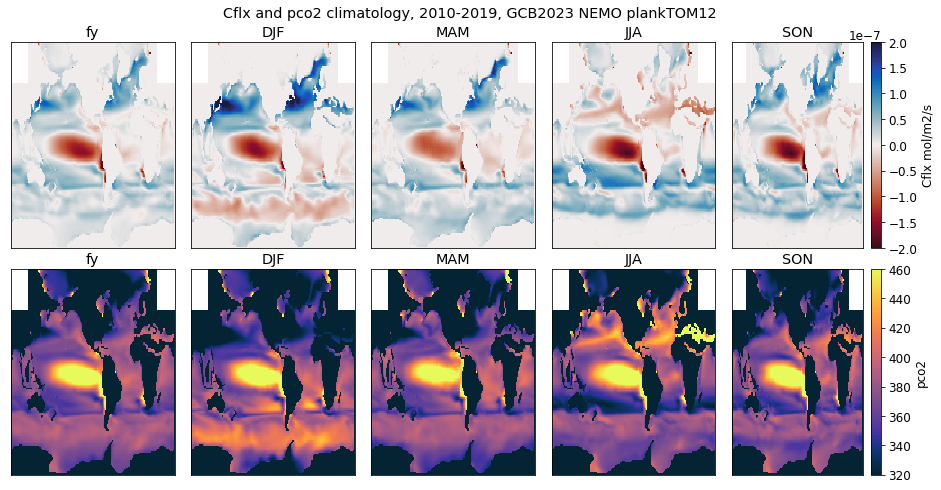

In [177]:
fact = 1.1
fig, axs = plt.subplots(2,5, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0; var = 'Cflx'; tvmin = -2e-7; tvmax = 2e-7
q = axs[0+ind].pcolormesh(rvao[var].mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.balance_r)

#sel(time_counter=(mld_1A['time_counter.season'] == 'DJF'))
axs[1+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'DJF').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.balance_r)
axs[2+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'MAM').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.balance_r)
axs[3+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'JJA').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.balance_r)
q = axs[4+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'SON').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.balance_r)
plt.colorbar(q, ax = axs[4+ind], label = 'Cflx mol/m2/s')

ind = 5; var = 'pCO2'; tvmin = 320; tvmax = 460
q = axs[0+ind].pcolormesh(rvao[var].mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.thermal)

#sel(time_counter=(mld_1A['time_counter.season'] == 'DJF'))
axs[1+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'DJF').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.thermal)
axs[2+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'MAM').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.thermal)
axs[3+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'JJA').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.thermal)
q = axs[4+ind].pcolormesh(rvao[var].sel(time_counter = rvao['time_counter.season'] == 'SON').mean(dim='time_counter'),\
                  vmin = tvmin, vmax = tvmax, cmap = cm.thermal)
plt.colorbar(q, ax = axs[4+ind], label = 'pco2')


for i in range(0,10):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.tight_layout()

tits = ['fy','DJF','MAM','JJA','SON']

for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i+5].set_title(tits[i])
    
plt.suptitle('Cflx and pco2 climatology, 2010-2019, GCB2023 NEMO plankTOM12', y = 1.02)